# Association Rules

- Apply association rules on grocery dataset using Apriori algorithm

Total item count: 43367


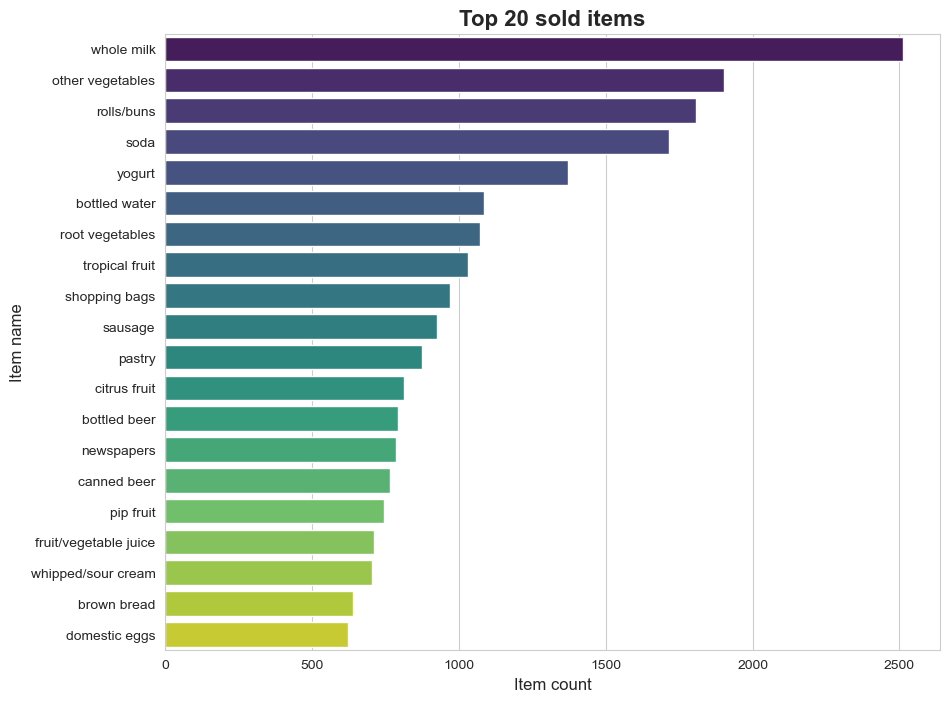

In [1]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

def read_data_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        lines = response.text.split('\n')
        grocery_items = set()
        transaction_list = []
        for line in lines:
            items = line.strip().split(',')
            grocery_items.update(items)
            transaction_list.append(items)

        # Convert transactions to binary format using TransactionEncoder
        te = TransactionEncoder()
        te_ary = te.fit_transform(transaction_list)
        df = pd.DataFrame(te_ary, columns=te.columns_)

        return df, grocery_items
    else:
        print("Failed to fetch data from URL.")
        return None, None

def view_top_sold_items(grocery):
    total_item_count = sum(grocery.sum())
    print(f'Total item count: {total_item_count}') # Total item count
    item_summary = grocery.sum().sort_values(ascending=False).reset_index()
    item_summary.rename(columns={item_summary.columns[0]: 'item_name', item_summary.columns[1]: 'item_count'}, inplace=True)

    # Set seaborn style
    sns.set_style(style="whitegrid")

    # Create horizontal bar plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x='item_count', y='item_name', data=item_summary.head(20),
                palette="viridis",
                # color='steelblue'
                )
    plt.xlabel('Item count', fontsize=12)
    plt.ylabel('Item name', fontsize=12)
    plt.title('Top 20 sold items', fontsize=16, fontweight='bold')
    plt.show()

url = "https://raw.githubusercontent.com/satishrath185/Market-Basket-Analysis/master/grocery_dataset.txt"
grocery, _ = read_data_from_url(url)
view_top_sold_items(grocery)


In [2]:
# Apriori algorithm
frequent_itemsets = apriori(grocery, min_support=0.01, use_colnames=True)
print(f' Number of frequent itemsets: {len(frequent_itemsets)}\n', frequent_itemsets, sep= '\n' ) # Number of frequent itemsets and frequent itemsets

# Association rules
rules = association_rules(frequent_itemsets,
                          metric="confidence",
                          min_threshold=0.01
                          )
# print(f' Number of association rules: {len(rules)}\n', rules, sep= '\n' ) # Number of association rules and association rules
# print number of rules
print(f' Number of association rules: {len(rules)}')

# Show association rules dataframe
rules

 Number of frequent itemsets: 332

      support                                       itemsets
0    0.033452                                     (UHT-milk)
1    0.017692                                (baking powder)
2    0.052466                                         (beef)
3    0.033249                                      (berries)
4    0.026029                                    (beverages)
..        ...                                            ...
327  0.011998  (tropical fruit, whole milk, root vegetables)
328  0.014540          (yogurt, whole milk, root vegetables)
329  0.010473                     (yogurt, whole milk, soda)
330  0.015150           (yogurt, tropical fruit, whole milk)
331  0.010880       (yogurt, whole milk, whipped/sour cream)

[332 rows x 2 columns]
 Number of association rules: 618


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416,0.512224
1,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095,0.601792
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329,0.307866
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337,0.357463
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
...,...,...,...,...,...,...,...,...,...,...
613,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,0.523711
614,"(whole milk, whipped/sour cream)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943,0.606250
615,(yogurt),"(whole milk, whipped/sour cream)",0.139502,0.032232,0.010880,0.077988,2.419607,0.006383,1.049627,0.681826
616,(whole milk),"(yogurt, whipped/sour cream)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807,0.688864


In [3]:
# Top 5 rules with highest support
rules.sort_values(by='support', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
303,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
302,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
358,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452,0.228543
359,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496
425,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,0.488608


In [4]:
# Rules with confidence greater than 0.5
rules[rules['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
433,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878
438,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
457,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107
463,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779
481,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003,0.519843
492,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,0.629935
510,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
554,"(whipped/sour cream, other vegetables)",(whole milk),0.028876,0.255516,0.014642,0.507042,1.984385,0.007263,1.510239,0.510816
565,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577
571,"(rolls/buns, root vegetables)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804,0.524192


In [5]:
# Rules with lift greater than 3 and number of items in antecedents is one
rules[(rules['lift'] > 3) & (rules['antecedents'].apply(lambda x: len(x) == 1))]
# rules[rules['lift'] > 3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
5,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,0.753189
441,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242,0.781720
443,(other vegetables),"(citrus fruit, root vegetables)",0.193493,0.017692,0.010371,0.053600,3.029608,0.006948,1.037941,0.830649
461,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866,0.743056
513,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776,0.765445
515,(other vegetables),"(tropical fruit, root vegetables)",0.193493,0.021047,0.012303,0.063584,3.020999,0.008231,1.045425,0.829482
562,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697,0.747497


In [6]:
# Check number of rules with strong conviction
print(f' Number of rules with strong conviction: {len(rules[rules["conviction"] > 1])}')

 Number of rules with strong conviction: 598


In [7]:
# Check the frequency of items in antecedents and show top 10
rules['antecedents'].value_counts().head(10)

antecedents
(whole milk)          70
(other vegetables)    62
(yogurt)              38
(rolls/buns)          35
(root vegetables)     33
(soda)                27
(tropical fruit)      25
(sausage)             16
(bottled water)       16
(citrus fruit)        16
Name: count, dtype: int64

In [8]:
# Check the frequency of items in consequents and show top 10
rules['consequents'].value_counts().head(10)

consequents
(whole milk)          70
(other vegetables)    62
(yogurt)              38
(rolls/buns)          35
(root vegetables)     33
(soda)                27
(tropical fruit)      25
(sausage)             16
(bottled water)       16
(citrus fruit)        16
Name: count, dtype: int64

In [9]:
# Top 5 rules with highest leverage
rules.sort_values(by='leverage', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
282,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
283,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941,0.688008
303,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
302,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
372,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913,0.578298


In [10]:
# Top 5 rules with highest zhangs_metric
rules.sort_values(by='zhangs_metric', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
443,(other vegetables),"(citrus fruit, root vegetables)",0.193493,0.017692,0.010371,0.053600,3.029608,0.006948,1.037941,0.830649
515,(other vegetables),"(tropical fruit, root vegetables)",0.193493,0.021047,0.012303,0.063584,3.020999,0.008231,1.045425,0.829482
441,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242,0.781720
513,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776,0.765445
497,(other vegetables),"(rolls/buns, root vegetables)",0.193493,0.024301,0.012201,0.063058,2.594890,0.007499,1.041366,0.762085


# Visualization of association rules for better understanding of rules

In [11]:
# Copy to new dataframe for plotting
rules_plot = rules.copy(deep=True)

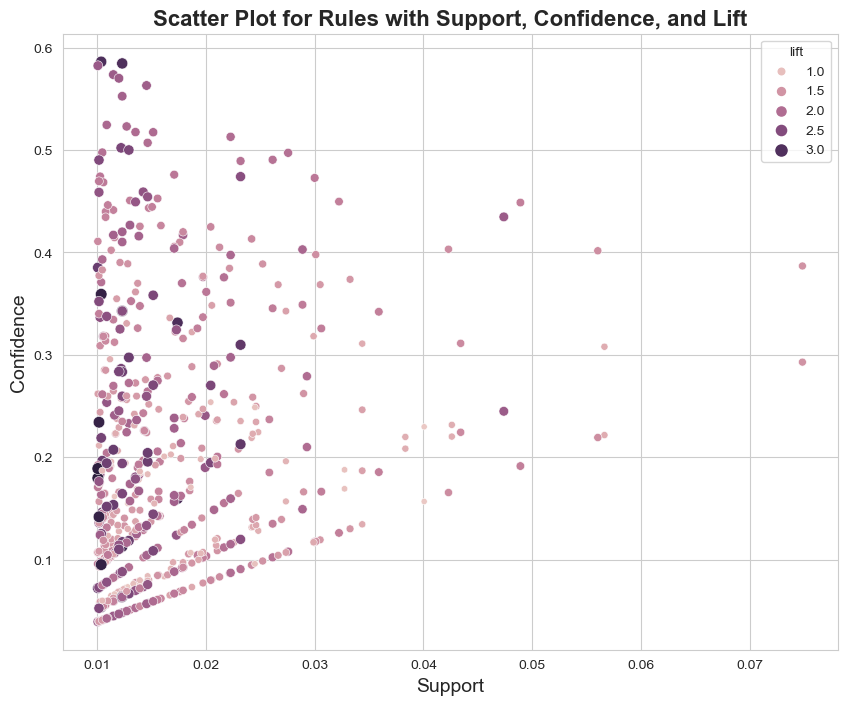

In [12]:
# Convert frozensets to strings
rules_plot['antecedents'] = rules_plot['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_plot['consequents'] = rules_plot['consequents'].apply(lambda x: ', '.join(list(x)))

# Scatter plot using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift',
                data=rules_plot)
plt.title('Scatter Plot for Rules with Support, Confidence, and Lift',
          fontsize=16, fontweight='bold')
plt.xlabel('Support', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
plt.show()

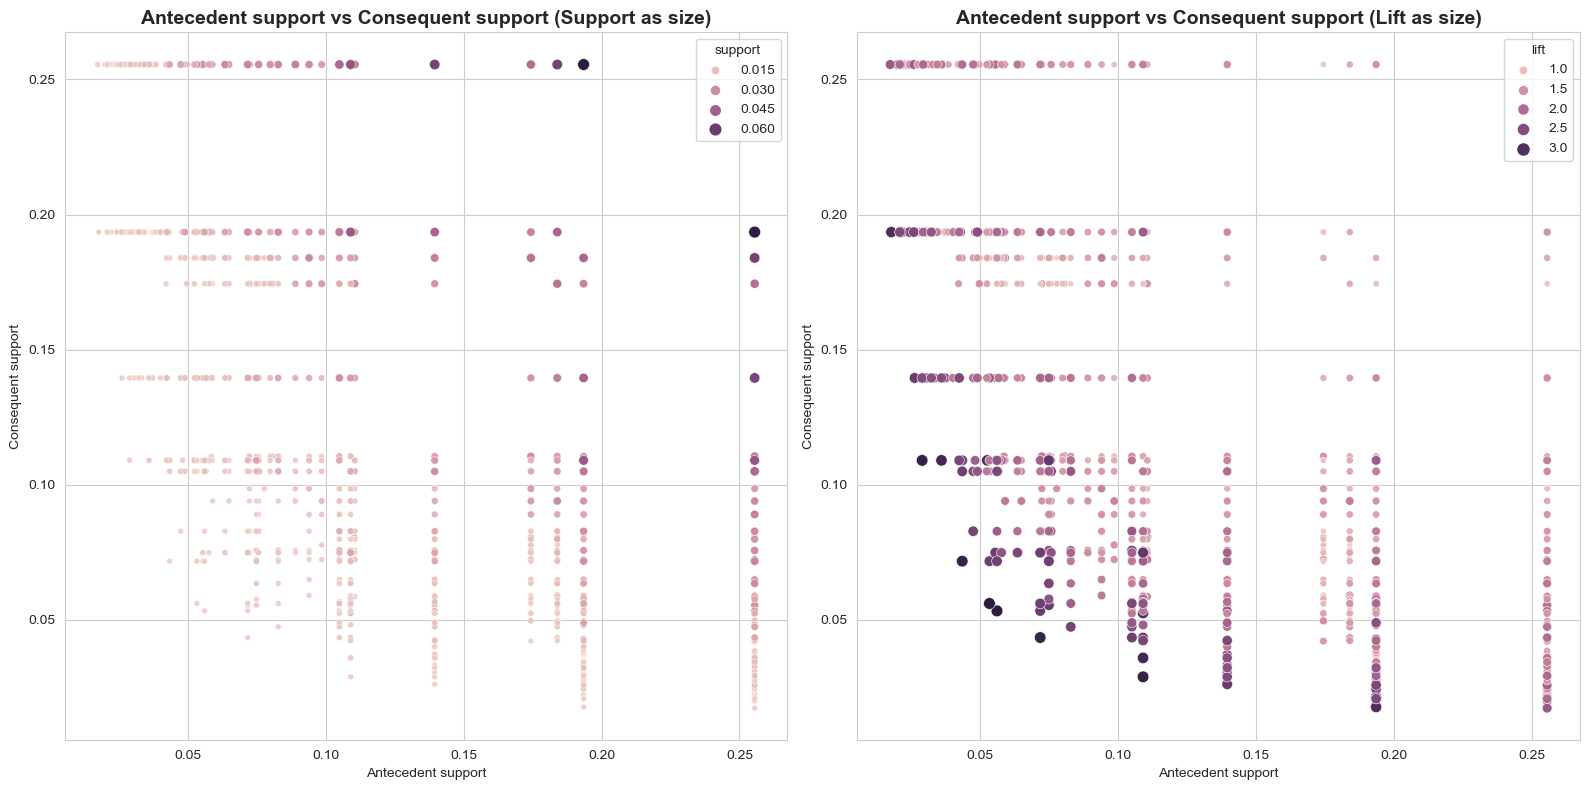

In [13]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot for antecedent support and consequent support
sns.scatterplot(x='antecedent support', y='consequent support', size='support',
                data=rules_plot, hue='support', ax=axes[0])
axes[0].set_xlabel('Antecedent support')
axes[0].set_ylabel('Consequent support')
axes[0].set_title('Antecedent support vs Consequent support (Support as size)',
                  fontsize=14, fontweight='bold')

# Scatter plot for antecedent support and consequent support with lift as size
sns.scatterplot(x='antecedent support', y='consequent support', size='lift',
                data=rules_plot, hue='lift', ax=axes[1])
axes[1].set_xlabel('Antecedent support')
axes[1].set_ylabel('Consequent support')
axes[1].set_title('Antecedent support vs Consequent support (Lift as size)',
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


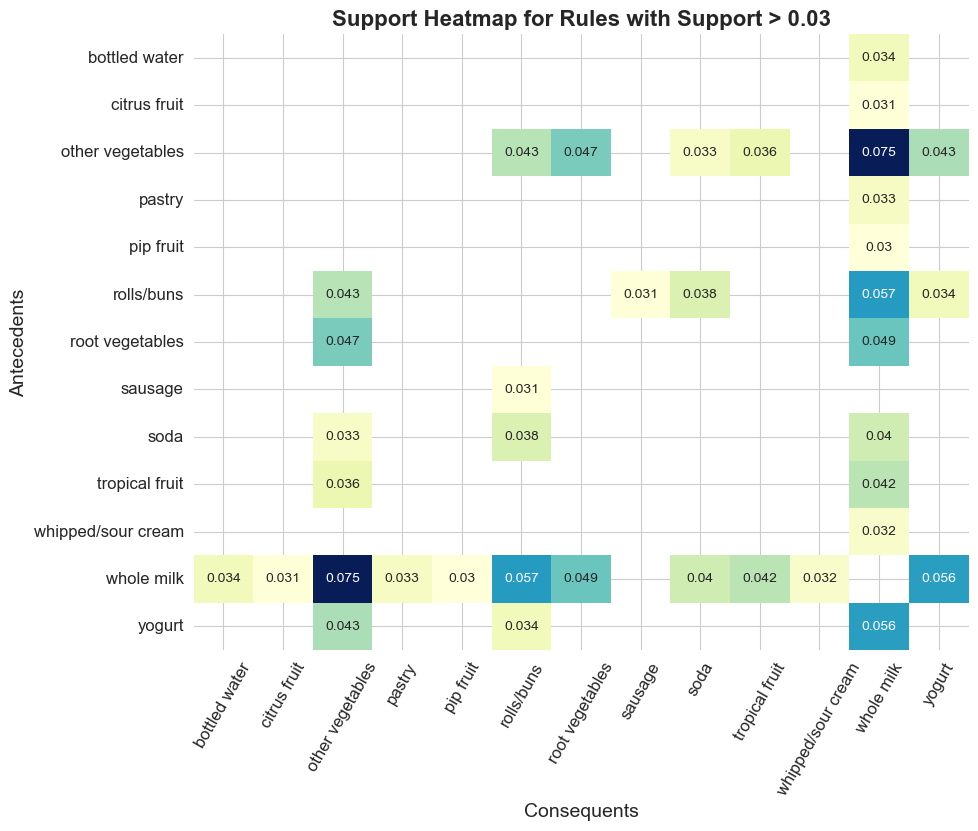

In [14]:
# Select rules with support greater than 0.04
rules_support_gt_03 = rules_plot[rules_plot['support'] > 0.03]
# Create pivot table
support_table = rules_support_gt_03.pivot(index='antecedents', columns='consequents', values='support')
# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(support_table, annot=True, cbar=False, cmap='YlGnBu')
plt.title('Support Heatmap for Rules with Support > 0.03', fontsize=16, fontweight='bold')
# Increase the size of y-axis label
ax.tick_params(axis='y', labelsize=12)
# Increase the size of x-axis label
ax.tick_params(axis='x', labelsize=12, rotation=60)
plt.xlabel('Consequents', fontsize=14)
plt.ylabel('Antecedents', fontsize=14)
plt.show()

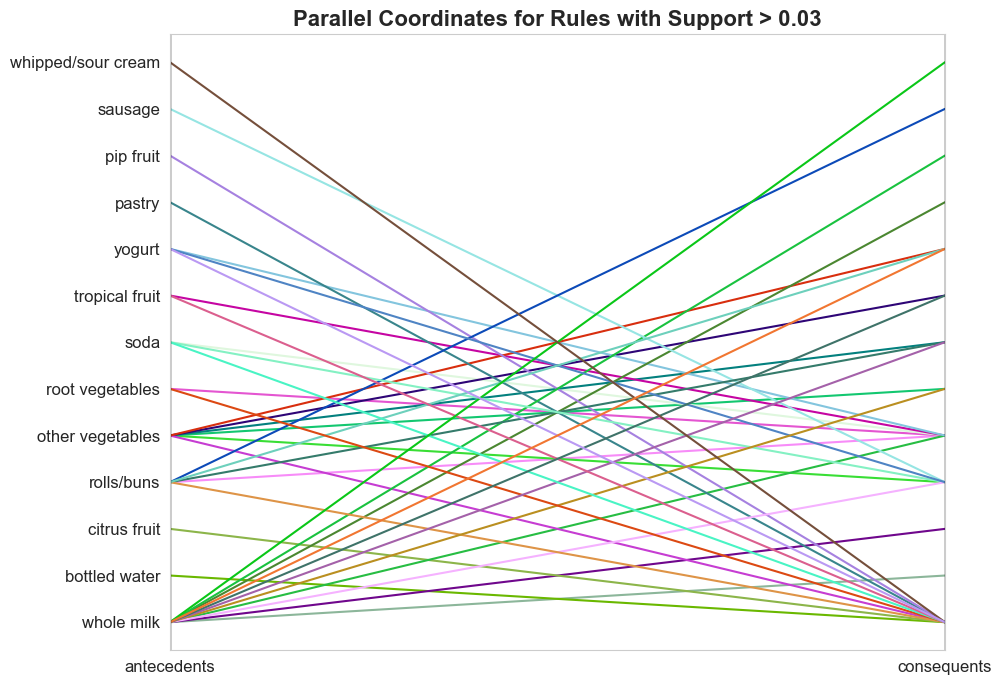

In [15]:
# Import parallel_coordinates
from pandas.plotting import parallel_coordinates

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
rules_support_gt_03 = rules_support_gt_03.copy()

# Convert rules to coordinates
rules_support_gt_03['rule'] = rules_support_gt_03.index

# Plot parallel coordinates
fig, ax = plt.subplots(figsize=(10, 8))
parallel_coordinates(rules_support_gt_03[['antecedents', 'consequents', 'rule']], 'rule',
                    #  colormap='YlGnBu',
                     ax=ax)
plt.title('Parallel Coordinates for Rules with Support > 0.03', fontsize=16, fontweight='bold')
# Increase the size of y-axis label
ax.tick_params(axis='y', labelsize=12)
# Increase the size of x-axis label
ax.tick_params(axis='x', labelsize=12)
# hide legend
ax.get_legend().remove()
plt.show()